# Worldwide Travel Cities (Ratings and Climate) Dataset from Kaggle

In [1]:
# Importing dependencies
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil

In [9]:
# Download latest version
path = kagglehub.dataset_download("furkanima/worldwide-travel-cities-ratings-and-climate")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/worldwide-travel-cities-ratings-and-climate


In [23]:
source_path = "/kaggle/input/worldwide-travel-cities-ratings-and-climate"
dest_path = "/content/"

# Ensure the destination directory exists
os.makedirs(dest_path, exist_ok=True)

# Move all files from source to destination
# for file_name in os.listdir(source_path):
#     source_file = os.path.join(source_path, file_name)
#     dest_file = os.path.join(dest_path, file_name)
    # shutil.move(source_file, dest_file)  # Use shutil.copy() if you want to copy instead of move

# Verify the files in /content/
print("Path to dataset files:", dest_path)
print("Files in /content/:", os.listdir(dest_path))

Path to dataset files: /content/
Files in /content/: ['.config', 'world_cities_budget_colored_map.html', 'world_travel_cities_map.html', 'Data.csv', '.ipynb_checkpoints', 'sample_data']


In [11]:
df = pd.read_csv("/content/Data.csv")

In [12]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 560 non-null    object 
 1   city               560 non-null    object 
 2   country            560 non-null    object 
 3   region             560 non-null    object 
 4   short_description  560 non-null    object 
 5   latitude           560 non-null    float64
 6   longitude          560 non-null    float64
 7   avg_temp_monthly   560 non-null    object 
 8   ideal_durations    560 non-null    object 
 9   budget_level       560 non-null    object 
 10  culture            560 non-null    int64  
 11  adventure          560 non-null    int64  
 12  nature             560 non-null    int64  
 13  beaches            560 non-null    int64  
 14  nightlife          560 non-null    int64  
 15  cuisine            560 non-null    int64  
 16  wellness           560 non

(                                     id            city    country  \
 0  c54acf38-3029-496b-8c7a-8343ad82785c           Milan      Italy   
 1  0bd12654-ed64-424e-a044-7bc574bcf078  Yasawa Islands       Fiji   
 2  73036cda-9134-46fc-a2c6-807782d59dfb        Whistler     Canada   
 3  3872c9c0-6b6e-49e1-9743-f46bfe591b86      Guanajuato     Mexico   
 4  e1ebc1b6-8798-422d-847a-22016faff3fd        Surabaya  Indonesia   
 
           region                                  short_description  \
 0         europe  Chic streets lined with fashion boutiques, his...   
 1        oceania  Crystal-clear waters, secluded beaches, and vi...   
 2  north_america  Snow-capped peaks and lush forests create a se...   
 3  north_america  Winding cobblestone streets and colorful facad...   
 4           asia  Bustling streets filled with the aroma of loca...   
 
     latitude   longitude                                   avg_temp_monthly  \
 0  45.464194    9.189635  {"1":{"avg":3.7,"max":7.8,"min"

## Preprocessing

In [13]:
import ast
import json
import numpy as np

In [14]:
# Clean 'ideal_durations': convert stringified list to actual list
df['ideal_durations'] = df['ideal_durations'].apply(ast.literal_eval)

# Convert 'avg_temp_monthly' from stringified JSON to dict
df['avg_temp_monthly'] = df['avg_temp_monthly'].apply(json.loads)

# Create new columns for average temperature across all months
def compute_yearly_avg(temp_dict):
    monthly_avgs = [v["avg"] for v in temp_dict.values()]
    return np.mean(monthly_avgs)

df['avg_temp_year'] = df['avg_temp_monthly'].apply(compute_yearly_avg)

# Extract most common ideal duration (mode of the list)
df['primary_duration'] = df['ideal_durations'].apply(lambda x: x[0] if x else np.nan)

# Drop irrelevant columns for analysis
eda_df = df.drop(columns=["id", "short_description", "avg_temp_monthly", "ideal_durations"])

eda_df.head()

,city,country,region,latitude,longitude,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion,avg_temp_year,primary_duration
0,Milan,Italy,europe,45.464194,9.189635,Luxury,5,2,2,1,4,5,3,5,2,14.750000,Short trip
1,Yasawa Islands,Fiji,oceania,-17.290947,177.125786,Luxury,2,4,5,5,2,3,4,1,5,26.975000,Long trip
2,Whistler,Canada,north_america,50.117190,-122.954302,Luxury,3,5,5,2,3,3,4,2,4,6.808333,Short trip
3,Guanajuato,Mexico,north_america,20.987700,-101.000000,Mid-range,5,3,3,1,3,4,3,4,2,19.533333,Weekend
4,Surabaya,Indonesia,asia,-7.245972,112.737827,Budget,4,3,3,2,3,4,3,4,2,28.758333,Short trip


## Visualization

### Univariate Analysis

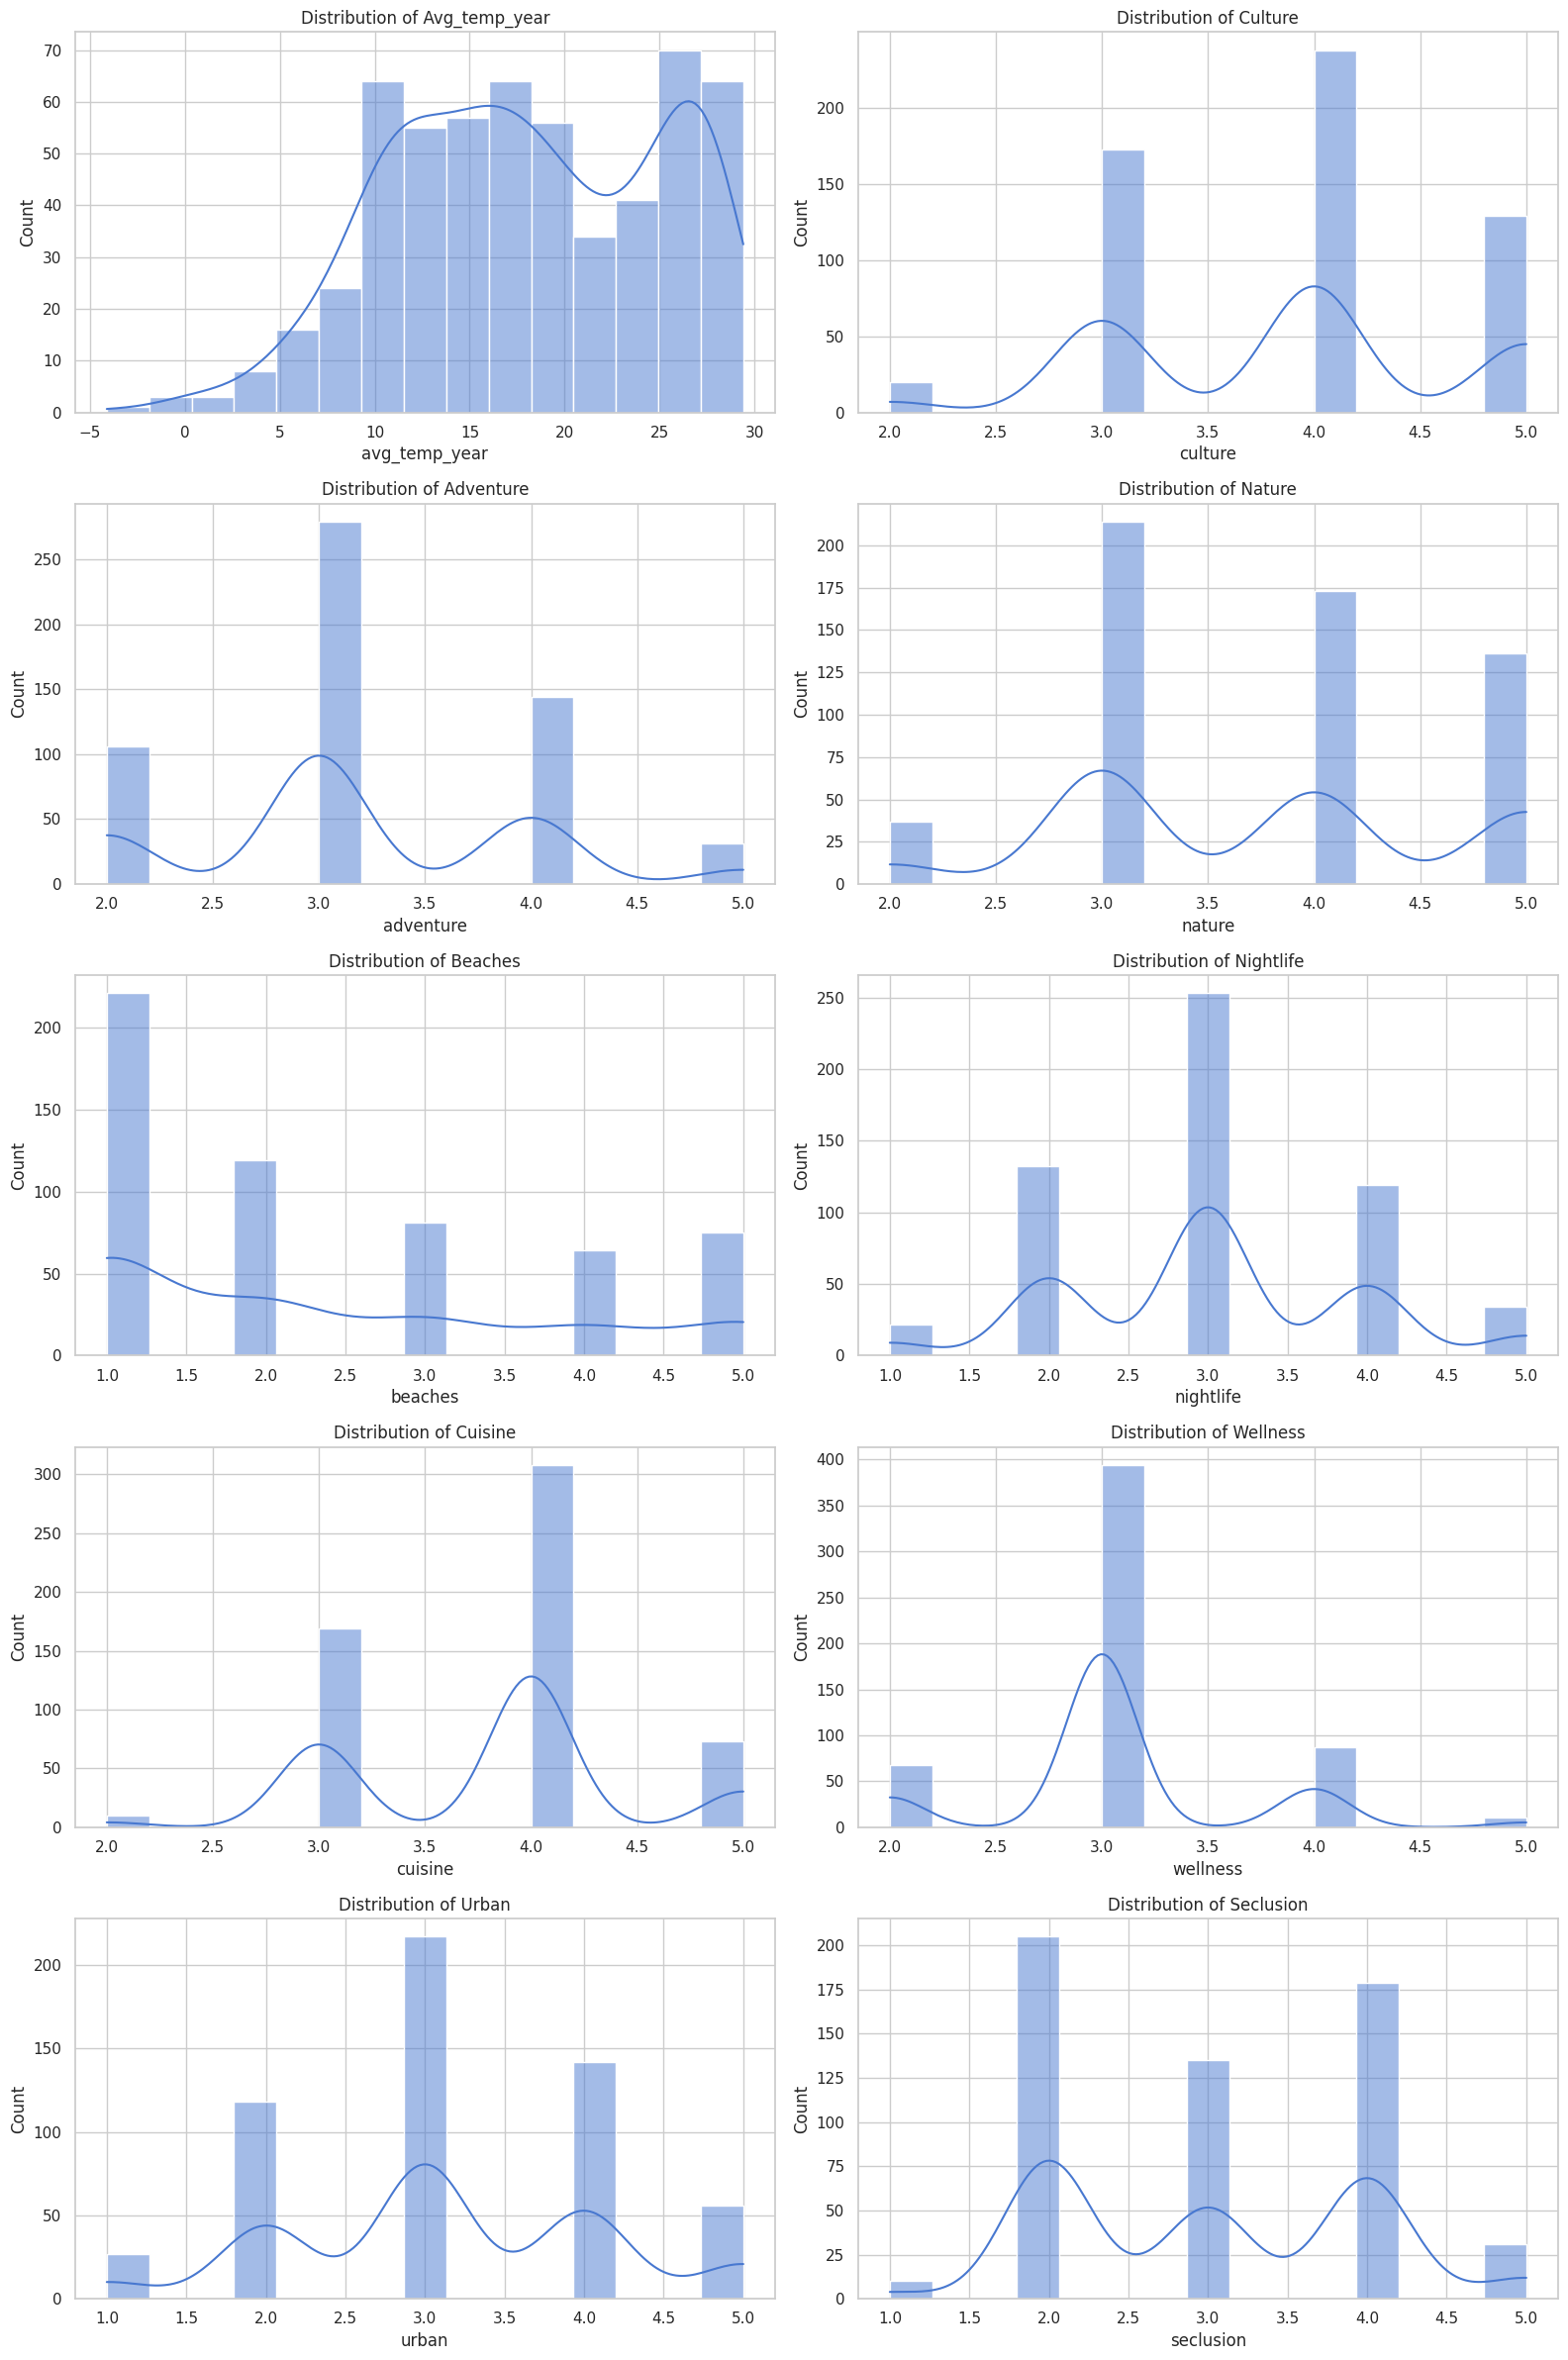

In [15]:
# Set style
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(16, 24))

# Numerical Features Distribution
numerical_cols = ['avg_temp_year', 'culture', 'adventure', 'nature', 'beaches', 'nightlife',
                  'cuisine', 'wellness', 'urban', 'seclusion']

for i, col in enumerate(numerical_cols):
    plt.subplot(5, 2, i + 1)
    sns.histplot(eda_df[col], kde=True, bins=15)
    plt.title(f'Distribution of {col.capitalize()}')

plt.tight_layout()
plt.show()

### Categorical Features

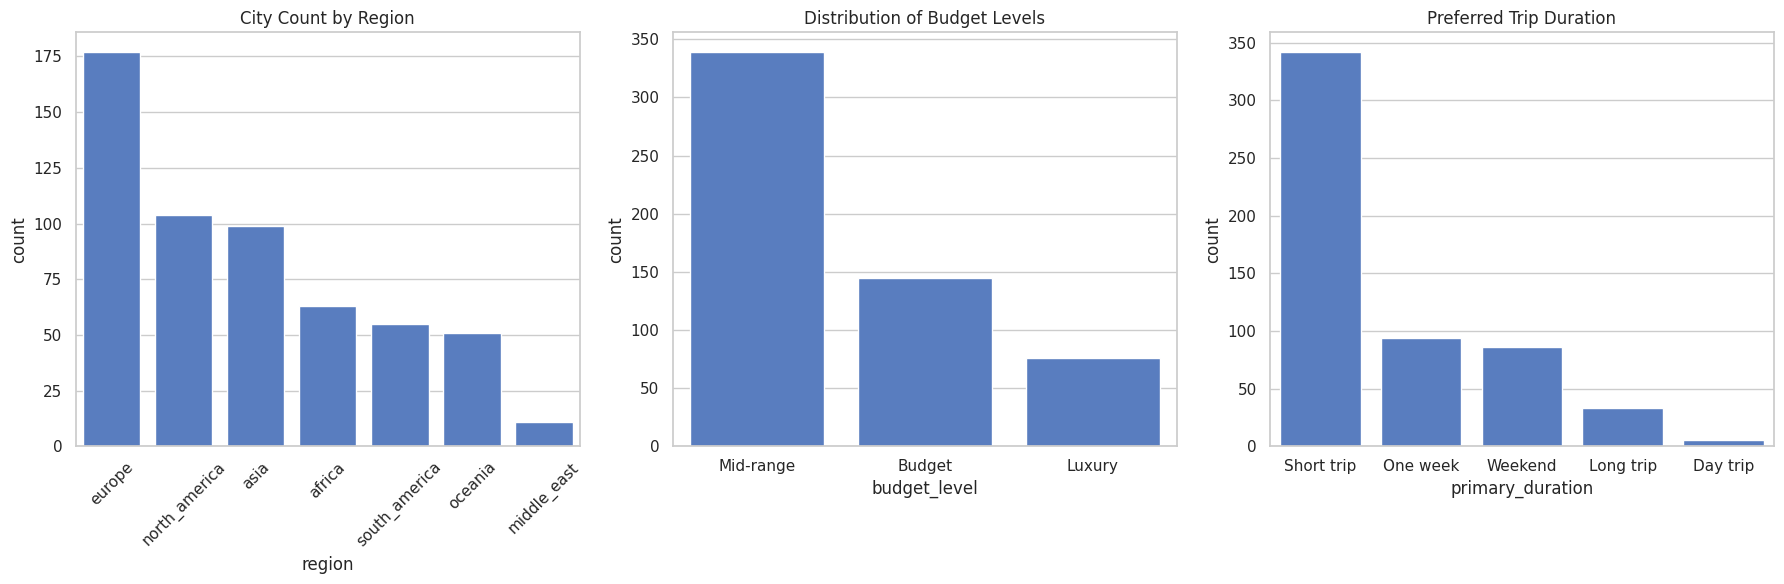

In [16]:
plt.figure(figsize=(18, 6))

# Categorical: Region
plt.subplot(1, 3, 1)
sns.countplot(data=eda_df, x="region", order=eda_df["region"].value_counts().index)
plt.title("City Count by Region")
plt.xticks(rotation=45)

# Categorical: Budget Level
plt.subplot(1, 3, 2)
sns.countplot(data=eda_df, x="budget_level", order=eda_df["budget_level"].value_counts().index)
plt.title("Distribution of Budget Levels")

# Categorical: Primary Trip Duration
plt.subplot(1, 3, 3)
sns.countplot(data=eda_df, x="primary_duration", order=eda_df["primary_duration"].value_counts().index)
plt.title("Preferred Trip Duration")

plt.tight_layout()
plt.show()

### Bivariate Analysis

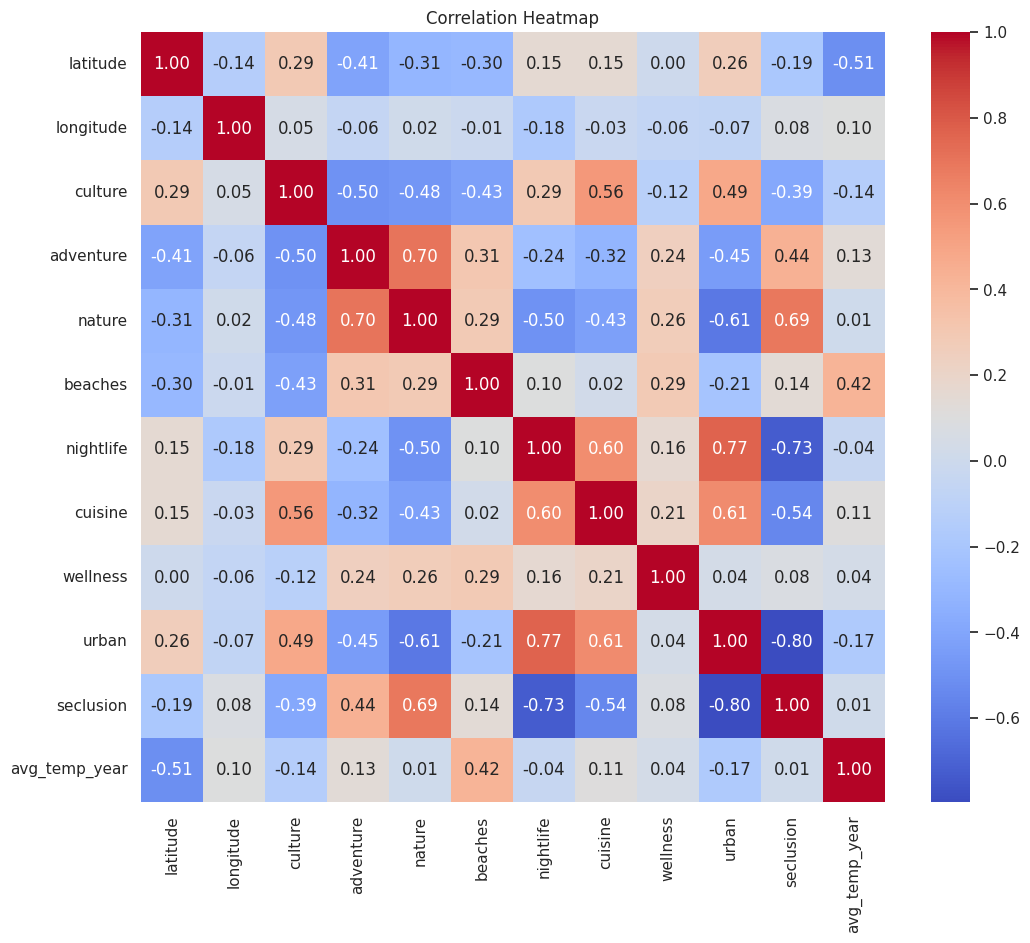

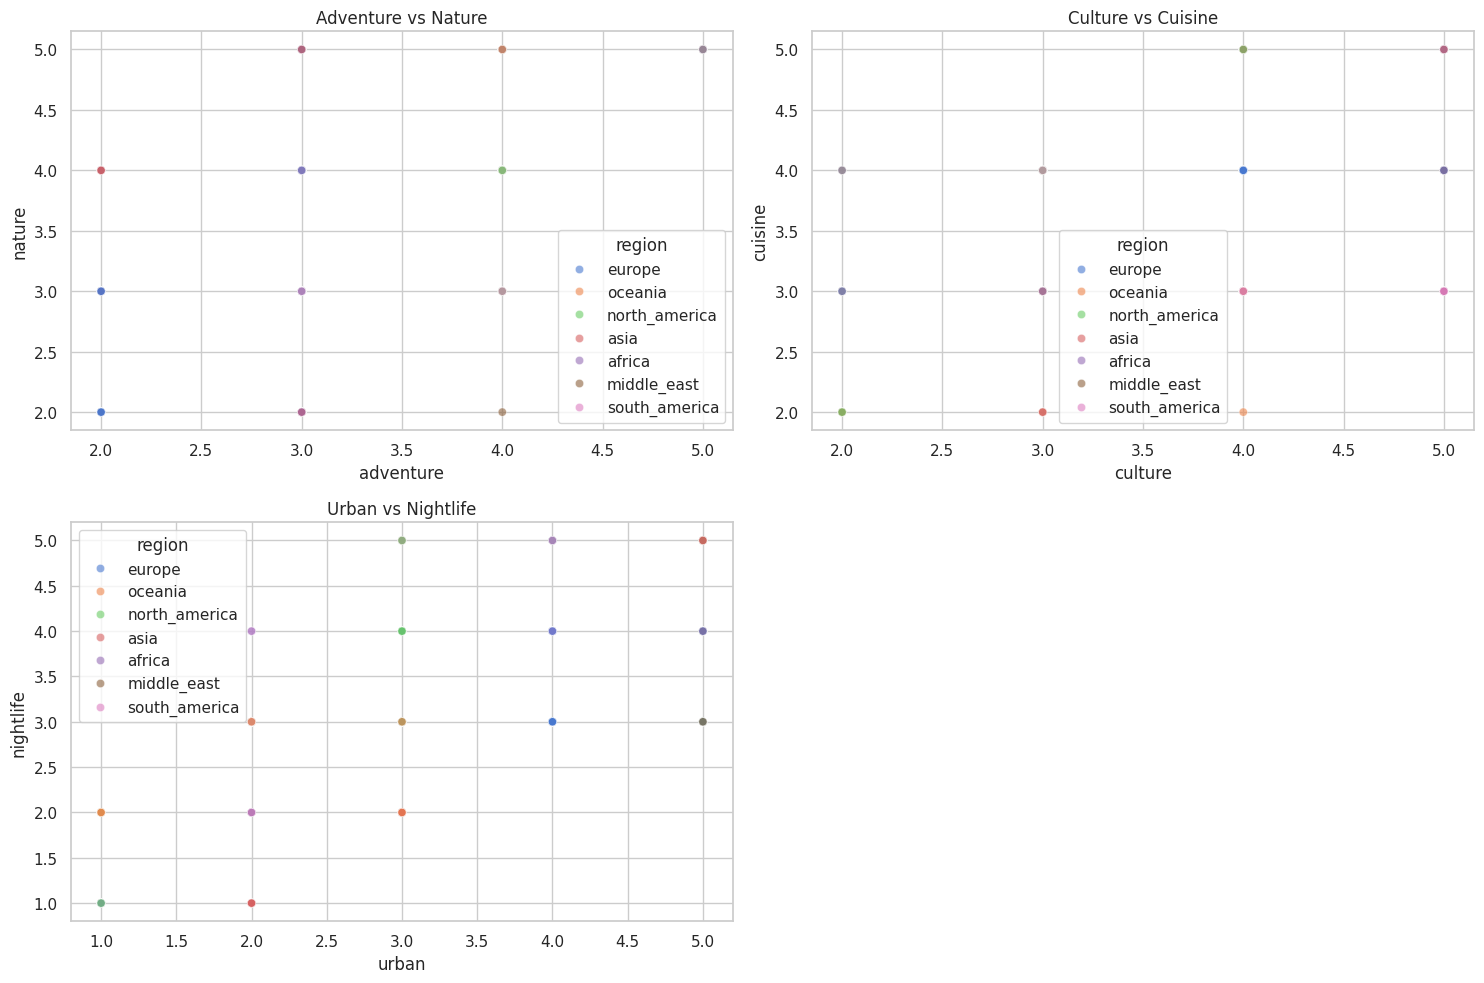

In [18]:
# Correlation heatmap (numerical features)
plt.figure(figsize=(12, 10))
sns.heatmap(eda_df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots between interest types
interest_pairs = [
    ('adventure', 'nature'),
    ('culture', 'cuisine'),
    ('urban', 'nightlife'),
]

plt.figure(figsize=(15, 10))
for i, (x, y) in enumerate(interest_pairs):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=eda_df, x=x, y=y, hue="region", alpha=0.6)
    plt.title(f'{x.capitalize()} vs {y.capitalize()}')
plt.tight_layout()
plt.show()

### Multivariate Analysis

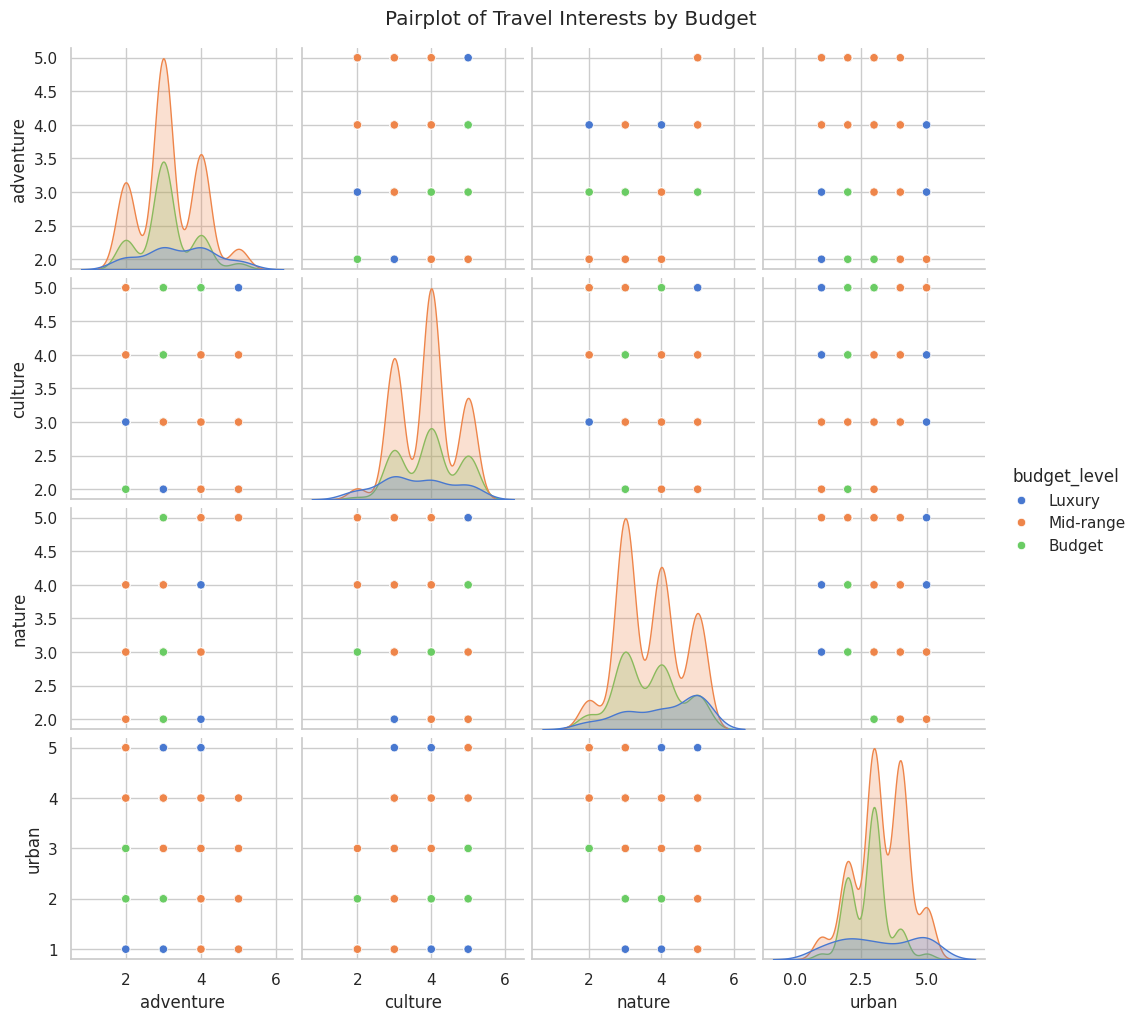

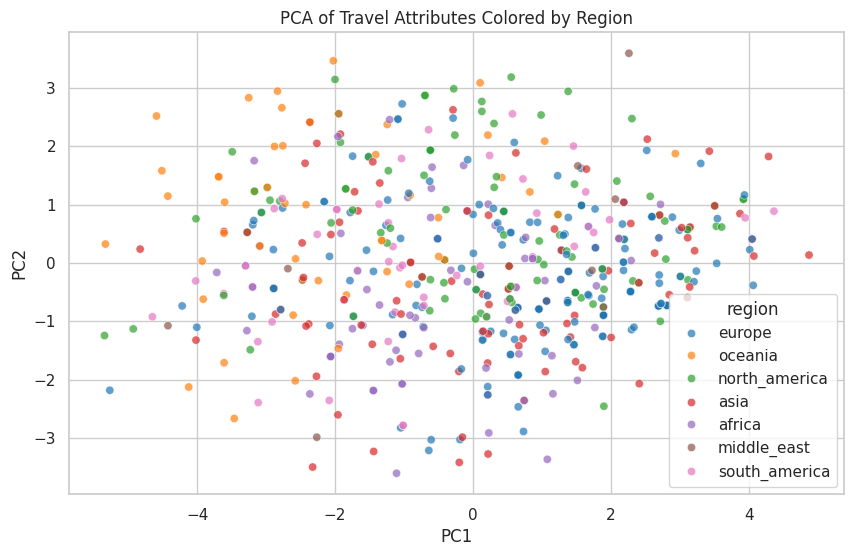

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Pairplot of selected dimensions
sns.pairplot(eda_df, vars=['adventure', 'culture', 'nature', 'urban'], hue='budget_level')
plt.suptitle("Pairplot of Travel Interests by Budget", y=1.02)
plt.show()

# PCA on travel attribute scores
features = ['culture', 'adventure', 'nature', 'beaches', 'nightlife', 'cuisine', 'wellness', 'urban', 'seclusion']
X = StandardScaler().fit_transform(eda_df[features])
pca = PCA(n_components=2)
components = pca.fit_transform(X)

pca_df = pd.DataFrame(components, columns=["PC1", "PC2"])
pca_df['region'] = eda_df['region']

# PCA scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="region", palette="tab10", alpha=0.7)
plt.title("PCA of Travel Attributes Colored by Region")
plt.show()


In [20]:
!pip install folium

### Something I Vibe coded

In [22]:
import folium
from folium.plugins import MarkerCluster

# Color mapping for budget levels
budget_colors = {
    "Budget": "green",
    "Mid-range": "orange",
    "Luxury": "red"
}

# Create base map
world_map = folium.Map(location=[20, 0], zoom_start=2, tiles='cartodbpositron')

# Add clustered markers
marker_cluster = MarkerCluster().add_to(world_map)

for _, row in eda_df.iterrows():
    # Assign color based on budget level
    color = budget_colors.get(row['budget_level'], "blue")

    # Prepare popup info
    popup_text = f"""
    <b>City:</b> {row['city']}<br>
    <b>Country:</b> {row['country']}<br>
    <b>Region:</b> {row['region']}<br>
    <b>Avg Temp:</b> {row['avg_temp_year']:.1f}°C<br>
    <b>Budget:</b> {row['budget_level']}<br>
    <b>Top Feature:</b> {row[['culture','adventure','nature','beaches','nightlife','cuisine','urban','seclusion']].idxmax()}
    """

    # Add marker
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(marker_cluster)

# Save or show map
world_map.save("world_cities_budget_colored_map.html")
world_map
